In [15]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [18]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/10
170/170 [==============================] - ETA: 0s - loss: 0.6428 - accuracy: 0.6537

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


170/170 [==============================] - 375s 2s/step - loss: 0.6428 - accuracy: 0.6537 - val_loss: 0.5361 - val_accuracy: 0.7426
Epoch 2/10
170/170 [==============================] - ETA: 0s - loss: 0.5147 - accuracy: 0.7388

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


170/170 [==============================] - 355s 2s/step - loss: 0.5147 - accuracy: 0.7388 - val_loss: 0.5162 - val_accuracy: 0.7353
Epoch 3/10
170/170 [==============================] - ETA: 0s - loss: 0.4118 - accuracy: 0.8109

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


170/170 [==============================] - 346s 2s/step - loss: 0.4118 - accuracy: 0.8109 - val_loss: 0.3681 - val_accuracy: 0.8382
Epoch 4/10
170/170 [==============================] - ETA: 0s - loss: 0.3356 - accuracy: 0.8593

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


170/170 [==============================] - 351s 2s/step - loss: 0.3356 - accuracy: 0.8593 - val_loss: 0.3300 - val_accuracy: 0.8647
Epoch 5/10
170/170 [==============================] - 347s 2s/step - loss: 0.2831 - accuracy: 0.8784 - val_loss: 0.3329 - val_accuracy: 0.8662
Epoch 6/10
170/170 [==============================] - ETA: 0s - loss: 0.2470 - accuracy: 0.8976

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


170/170 [==============================] - 346s 2s/step - loss: 0.2470 - accuracy: 0.8976 - val_loss: 0.2951 - val_accuracy: 0.8779
Epoch 7/10
170/170 [==============================] - 339s 2s/step - loss: 0.2058 - accuracy: 0.9152 - val_loss: 0.3203 - val_accuracy: 0.8721
Epoch 8/10
170/170 [==============================] - 339s 2s/step - loss: 0.1798 - accuracy: 0.9268 - val_loss: 0.2961 - val_accuracy: 0.8860
Epoch 9/10
170/170 [==============================] - ETA: 0s - loss: 0.1438 - accuracy: 0.9441

INFO:tensorflow:Assets written to: model-009.model\assets


INFO:tensorflow:Assets written to: model-009.model\assets


170/170 [==============================] - 1109s 7s/step - loss: 0.1438 - accuracy: 0.9441 - val_loss: 0.2879 - val_accuracy: 0.9059
Epoch 10/10
170/170 [==============================] - ETA: 0s - loss: 0.1350 - accuracy: 0.9452

INFO:tensorflow:Assets written to: model-010.model\assets


INFO:tensorflow:Assets written to: model-010.model\assets


170/170 [==============================] - 348s 2s/step - loss: 0.1350 - accuracy: 0.9452 - val_loss: 0.2790 - val_accuracy: 0.8853


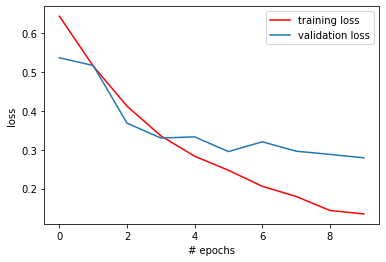

In [19]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

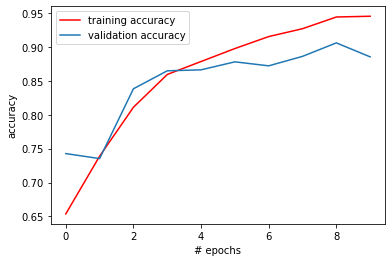

In [20]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [21]:
print(model.evaluate(test_data,test_target))

24/24 [==============================] - 14s 590ms/step - loss: 0.3115 - accuracy: 0.8783
[0.31149908900260925, 0.8783068656921387]
